In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


plt.rcParams.update({'font.size': 18})

In [6]:
plotting_data=torch.load("./trajs.pth")
#
trajs_trss=plotting_data['trajs_trss']
trajs_tess=plotting_data['trajs_tess']
sep_cols=plotting_data['sep_cols']
images=plotting_data['images']
n_trajs=len(trajs_trss)

In [8]:
trajs_trss.shape # (20 fordifferent color separations, 3 for the 3 different training classes, 60 for the 60 timesteps, 2 for colorprob and sizeprob)

(20, 3, 60, 2)

In [9]:
cmap="gnuplot"
norm = mcolors.Normalize(vmin=0.1, vmax=0.8)
def sep_col_to_color(sep_col,cmap="gnuplot"):
    return matplotlib.colormaps[cmap](norm(sep_col))

In [10]:
i_step_min=0
i_star=20

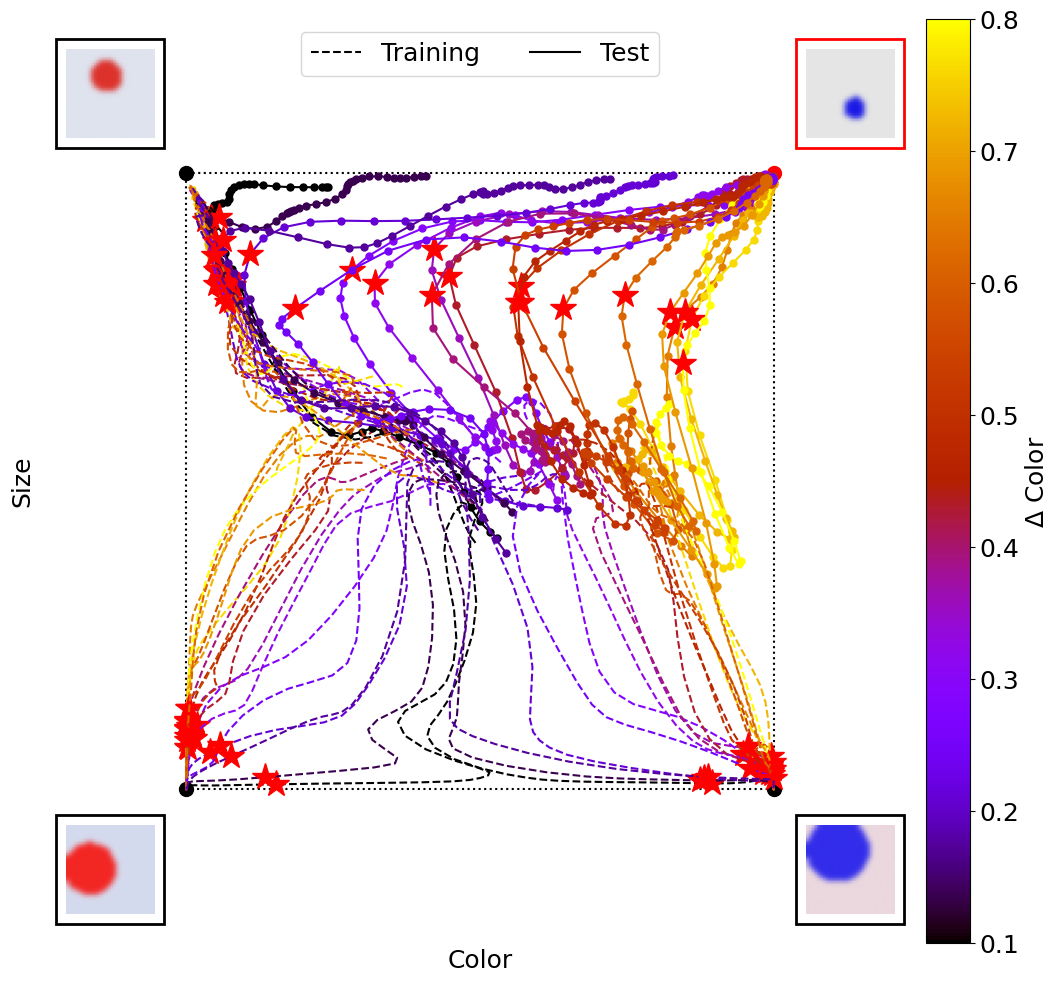

In [39]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 18})

plt.plot([0,1,1,0,0,0],[0,0,1,1,0,0],c="k",ls=":")
plt.scatter([0,0,1],[0,1,0],c="k",s=100)
plt.scatter([1],[1],c="r",s=100)
for i in range(n_trajs):
    sep_col=sep_cols[i]
    color=sep_col_to_color(sep_col,cmap=cmap)
    train_destinations=np.array([[0.,0.],[0.,1.],[1.,0.]])#sorry, hard coded
    i_train_saturate=np.nonzero(((trajs_trss[i]-train_destinations[:,None,:])**2).mean((0,2))<0.01)[0].min()

    plt.plot(trajs_tess[i,i_step_min:,0],trajs_tess[i,i_step_min:,1],marker="o",c=color,markersize=5)
    plt.plot(trajs_tess[i,i_train_saturate,0],trajs_tess[i,i_train_saturate,1],marker="*",c="r",markersize=20)
    for j in range(3):
        plt.plot(trajs_trss[i,j,i_step_min:,0],trajs_trss[i,j,i_step_min:,1],ls="--",c=color)
        plt.plot(trajs_trss[i,j,i_train_saturate,0],trajs_trss[i,j,i_train_saturate,1],marker="*",c="r",markersize=20)

plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.ylabel("Size")
plt.xlabel("Color")
plt.plot([],[],c="k",ls="--",label="Training")
plt.plot([],[],c="k",label="Test")
plt.legend(loc="upper center",ncol=2)

for l in [0,1,2,3]:
    image=images[l]
    imagebox = OffsetImage(image, zoom = 2.0)
    s=0.13
    coord={0:[0.-s,0.-s],1:[0.-s,1.+s],2:[1.+s,0.-s],3:[1.+s,1.+s]}[l]
    ab = AnnotationBbox(imagebox, coord, frameon = True ,bboxprops=dict(edgecolor="k" if l in [0,1,2] else "r",lw=2))
    plt.gca().add_artist(ab)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label(r"$\Delta$ Color")

In [32]:
i_train_saturate

array([2.73382777e-01, 2.68614599e-01, 2.60831122e-01, 2.51099269e-01,
       2.39093209e-01, 2.24293943e-01, 2.06554093e-01, 1.86437470e-01,
       1.65571876e-01, 1.45660825e-01, 1.26904332e-01, 1.08140318e-01,
       8.87932398e-02, 7.00335049e-02, 5.37727580e-02, 4.10938296e-02,
       3.17385855e-02, 2.45975436e-02, 1.85873042e-02, 1.32584164e-02,
       8.79475566e-03, 5.56825554e-03, 3.63459357e-03, 2.66506692e-03,
       2.26308203e-03, 2.16942071e-03, 2.23792307e-03, 2.35488867e-03,
       2.39007561e-03, 2.21567462e-03, 1.81607462e-03, 1.34501123e-03,
       9.89108499e-04, 8.21672520e-04, 8.18814722e-04, 9.16964374e-04,
       1.02196767e-03, 1.04782407e-03, 1.00046336e-03, 9.72723883e-04,
       1.03777531e-03, 1.17214610e-03, 1.25542374e-03, 1.17156457e-03,
       9.39239811e-04, 6.78909607e-04, 4.73348708e-04, 3.31468067e-04,
       2.40857935e-04, 1.98680000e-04, 2.08329060e-04, 2.72530215e-04,
       3.81055211e-04, 4.97707378e-04, 5.75332015e-04, 5.87591495e-04,
      

In [30]:
trajs_trss[0,:,-1]

array([[5.6928025e-07, 5.7353770e-08],
       [2.1245580e-02, 9.6184158e-01],
       [1.0000000e+00, 3.3231434e-05]], dtype=float32)

In [16]:
train_destinations[None,:,None,:].shape

(1, 3, 1, 2)

In [18]:
plot_datass={}
c=0
for fol in glob.glob("../data/images_1/2x2_final2/sc4ss4/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/col_sweep/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/size_sweep/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/detailed/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/sc4ss4_sfixed/*/seed=*"):
    parentfolname=os.path.basename(os.path.dirname(fol))
    sep_col=parentfolname.split("sep_col=")[1].split("_")[0]
    sep_size=parentfolname.split("sep_size=")[1].split("_")[0]
    plot_data_file=os.path.join(fol,"plot_data.pth")
    if not os.path.exists(plot_data_file):
        continue
    plot_data=torch.load(plot_data_file)
    plot_data["sep_col"]=sep_col
    plot_data["sep_size"]=sep_size
    plot_datass.setdefault((sep_col,sep_size),[]).append(plot_data)
    c+=1
len(plot_datass),c

(16, 80)

In [4]:
import scipy.ndimage as sim
def get_i_learned(accs,consistent=3):
    assert consistent%2==1
    #find portion of acc where accs is positive for 3 values
    structure=np.ones(consistent)
    goods=sim.binary_erosion(accs,structure=structure)
    inds=np.nonzero(goods)[0]
    if len(inds)>=1:
        return np.min(inds)
    else:
        return None

In [35]:
sep_cols,sep_sizes=zip(*plot_datass.keys())
sep_cols=np.array(sep_cols)
sep_cols=np.unique(sep_cols)
sep_cols_float=np.array([float(x) for x in sep_cols])
sep_sizes=np.array(sep_sizes)
sep_sizes=np.unique(sep_sizes)
sep_sizes_float=np.array([float(x) for x in sep_sizes])
sep_cols,sep_sizes

(array(['0.2', '0.4', '0.6', '0.8'], dtype='<U3'),
 array(['0.1', '0.2', '0.3', '0.4'], dtype='<U3'))

In [36]:
import scipy.ndimage as sim
t_cols=np.full((len(sep_cols),len(sep_sizes)),np.nan)
t_cols_s=np.full((len(sep_cols),len(sep_sizes)),np.nan)
t_sizes=np.full((len(sep_cols),len(sep_sizes)),np.nan)
t_sizes_s=np.full((len(sep_cols),len(sep_sizes)),np.nan)
for key,plot_datas in plot_datass.items():
    sep_col=key[0]
    sep_size=key[1]
    i_sep_col=np.where(sep_cols==sep_col)[0][0]
    i_sep_size=np.where(sep_sizes==sep_size)[0][0]

    rightss_tr=[]
    rightss_te=[]
    for i in range(len(plot_datas)):
        plot_data=plot_datas[i]
        save_steps=plot_data["save_steps"]
        #rights_tr=plot_data["rightprobss_tr"]
        #rights_te=plot_data["rightprobss_te"]
        rights_tr=plot_data["rights_tr"]
        rights_te=plot_data["rights_te"]
        rightss_tr.append(rights_tr)
        rightss_te.append(rights_te)
    rightss_tr=np.stack(rightss_tr,axis=0)
    rightss_te=np.stack(rightss_te,axis=0)
    rightss_te=rightss_te.astype(np.float32)
    accs_m=rightss_te.mean(2)
    accs_s=rightss_te.std(2)
    #accs_smoothed=sim.gaussian_filter1d(accs_m-0.25*accs_s,1.0,axis=1)
    accs_smoothed=sim.gaussian_filter1d(accs_m,1.5,axis=1)
    thres=0.9
    save_steps=plot_datas[0]["save_steps"]
    i_learned_cols=[get_i_learned(acc_smoothed[:,0]>thres,consistent=3) for acc_smoothed in accs_smoothed]
    i_learned_sizes=[get_i_learned(acc_smoothed[:,1]>thres,consistent=3) for acc_smoothed in accs_smoothed]
    step_learned_cols=[20000 if el is None else save_steps[el] for el in i_learned_cols]
    step_learned_sizes=[20000 if el is None else save_steps[el] for el in i_learned_sizes]
    t_cols[i_sep_col,i_sep_size]=np.mean(step_learned_cols)
    t_cols_s[i_sep_col,i_sep_size]=np.std(step_learned_cols,ddof=1)
    t_sizes[i_sep_col,i_sep_size]=np.mean(step_learned_sizes)
    t_sizes_s[i_sep_col,i_sep_size]=np.std(step_learned_sizes,ddof=1)
    #save_steps=plot_datas[0]["save_steps"]
    #if i_learned_col is None:
    #    t_cols[i_sep_col,i_sep_size]=np.nan
    #else:
    #    t_cols[i_sep_col,i_sep_size]=save_steps[i_learned_col]
    #if i_learned_size is None:
    #    t_sizes[i_sep_col,i_sep_size]=np.nan
    #else:
    #    t_sizes[i_sep_col,i_sep_size]=save_steps[i_learned_size]
"""
for i in range(5):
    plt.plot(save_steps,accs_smoothed[i,:,0],c="r",alpha=0.5)
    plt.plot(save_steps,accs_smoothed[i,:,1],c="b",alpha=0.5)
    plt.plot(save_steps,accs_smoothed.mean(0)[:,0],c="r")
    plt.plot(save_steps,accs_smoothed.mean(0)[:,1],c="b")
"""
None

Text(0.5, 0, '$\\Delta$ Size')

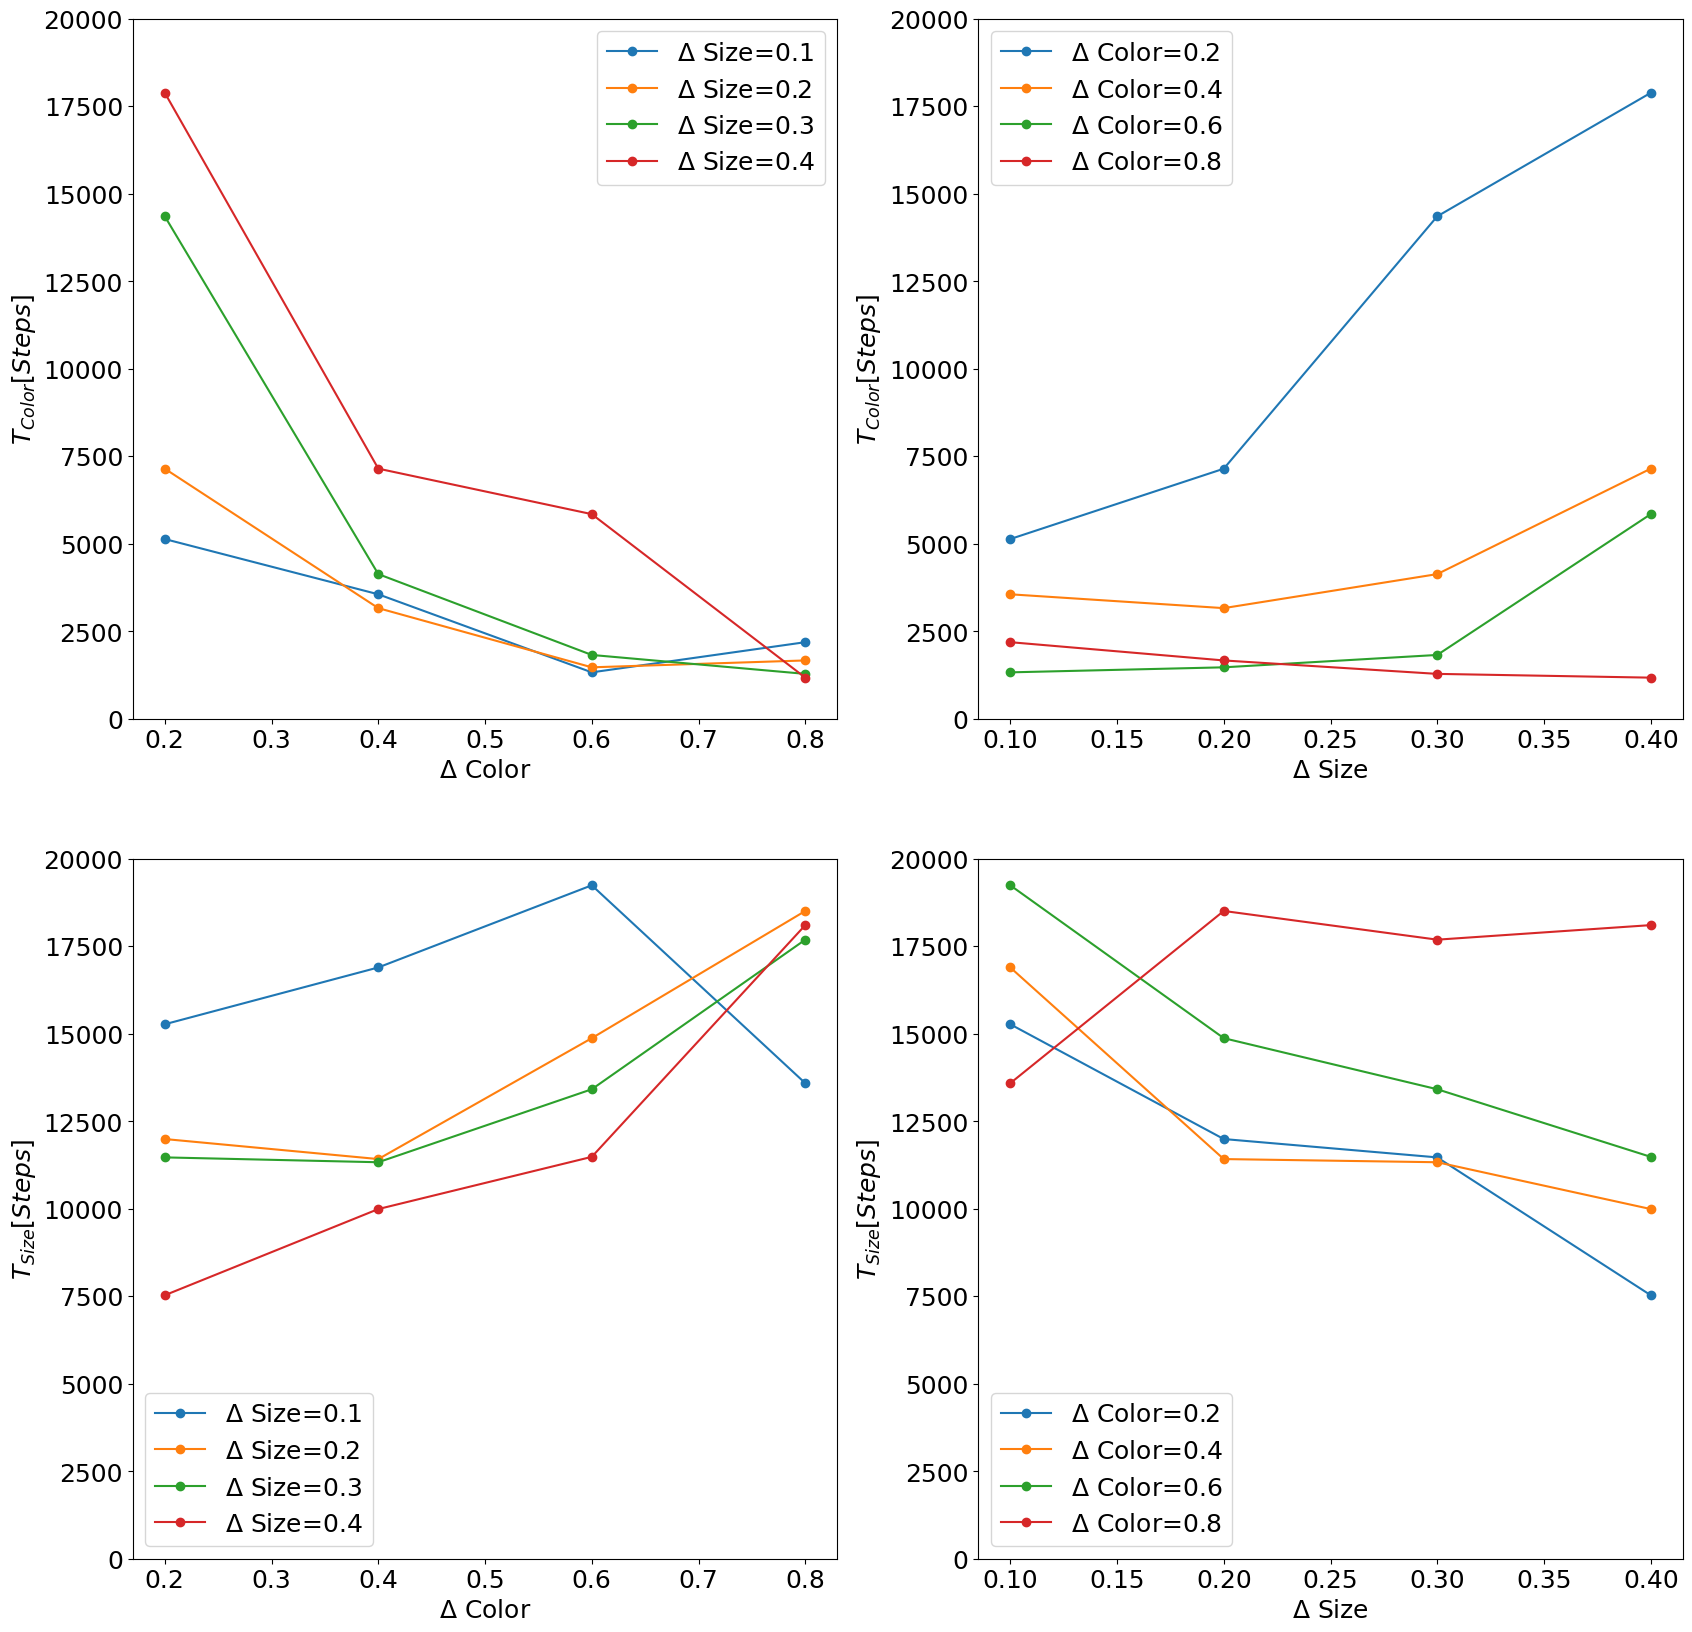

In [37]:
y_top=20000

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
for i in range(len(sep_sizes)):
    plt.plot(sep_cols_float,t_cols[:,i],label=r"$\Delta$ Size"+f"={sep_sizes[i]}",marker="o")
    #plt.fill_between(sep_cols_float,t_cols[:,i]-t_cols_s[:,i],t_cols[:,i]+t_cols_s[:,i],alpha=0.5)
plt.legend()
plt.ylim(0,y_top)
plt.ylabel(r"$T_{Color} [Steps]$")
plt.xlabel(r"$\Delta$ Color")
plt.subplot(2,2,2)
for i in range(len(sep_cols)):
    plt.plot(sep_sizes_float,t_cols[i],label=r"$\Delta$ Color"+f"={sep_cols[i]}",marker="o")
    #plt.fill_between(sep_sizes_float,t_cols[i]-t_cols_s[i],t_cols[i]+t_cols_s[i],alpha=0.5)
plt.legend()
plt.ylim(0,y_top)
plt.ylabel(r"$T_{Color} [Steps]$")
plt.xlabel(r"$\Delta$ Size")

plt.subplot(2,2,3)
for i in range(len(sep_sizes)):
    plt.plot(sep_cols_float,t_sizes[:,i],label=r"$\Delta$ Size"+f"={sep_sizes[i]}",marker="o")
    #plt.fill_between(sep_cols_float,t_sizes[:,i]-t_sizes_s[:,i],t_sizes[:,i]+t_sizes_s[:,i],alpha=0.5)
plt.legend()
plt.ylim(0,y_top)
plt.ylabel(r"$T_{Size} [Steps]$")
plt.xlabel(r"$\Delta$ Color")
plt.subplot(2,2,4)
for i in range(len(sep_cols)):
    plt.plot(sep_sizes_float,t_sizes[i],label=r"$\Delta$ Color"+f"={sep_cols[i]}",marker="o")
    #plt.fill_between(sep_sizes_float,t_sizes[i]-t_sizes_s[i],t_sizes[i]+t_sizes_s[i],alpha=0.5)
plt.legend()
plt.ylim(0,y_top)
plt.ylabel(r"$T_{Size} [Steps]$")
plt.xlabel(r"$\Delta$ Size")
#plt.savefig("../figures/final/learning_times.png")

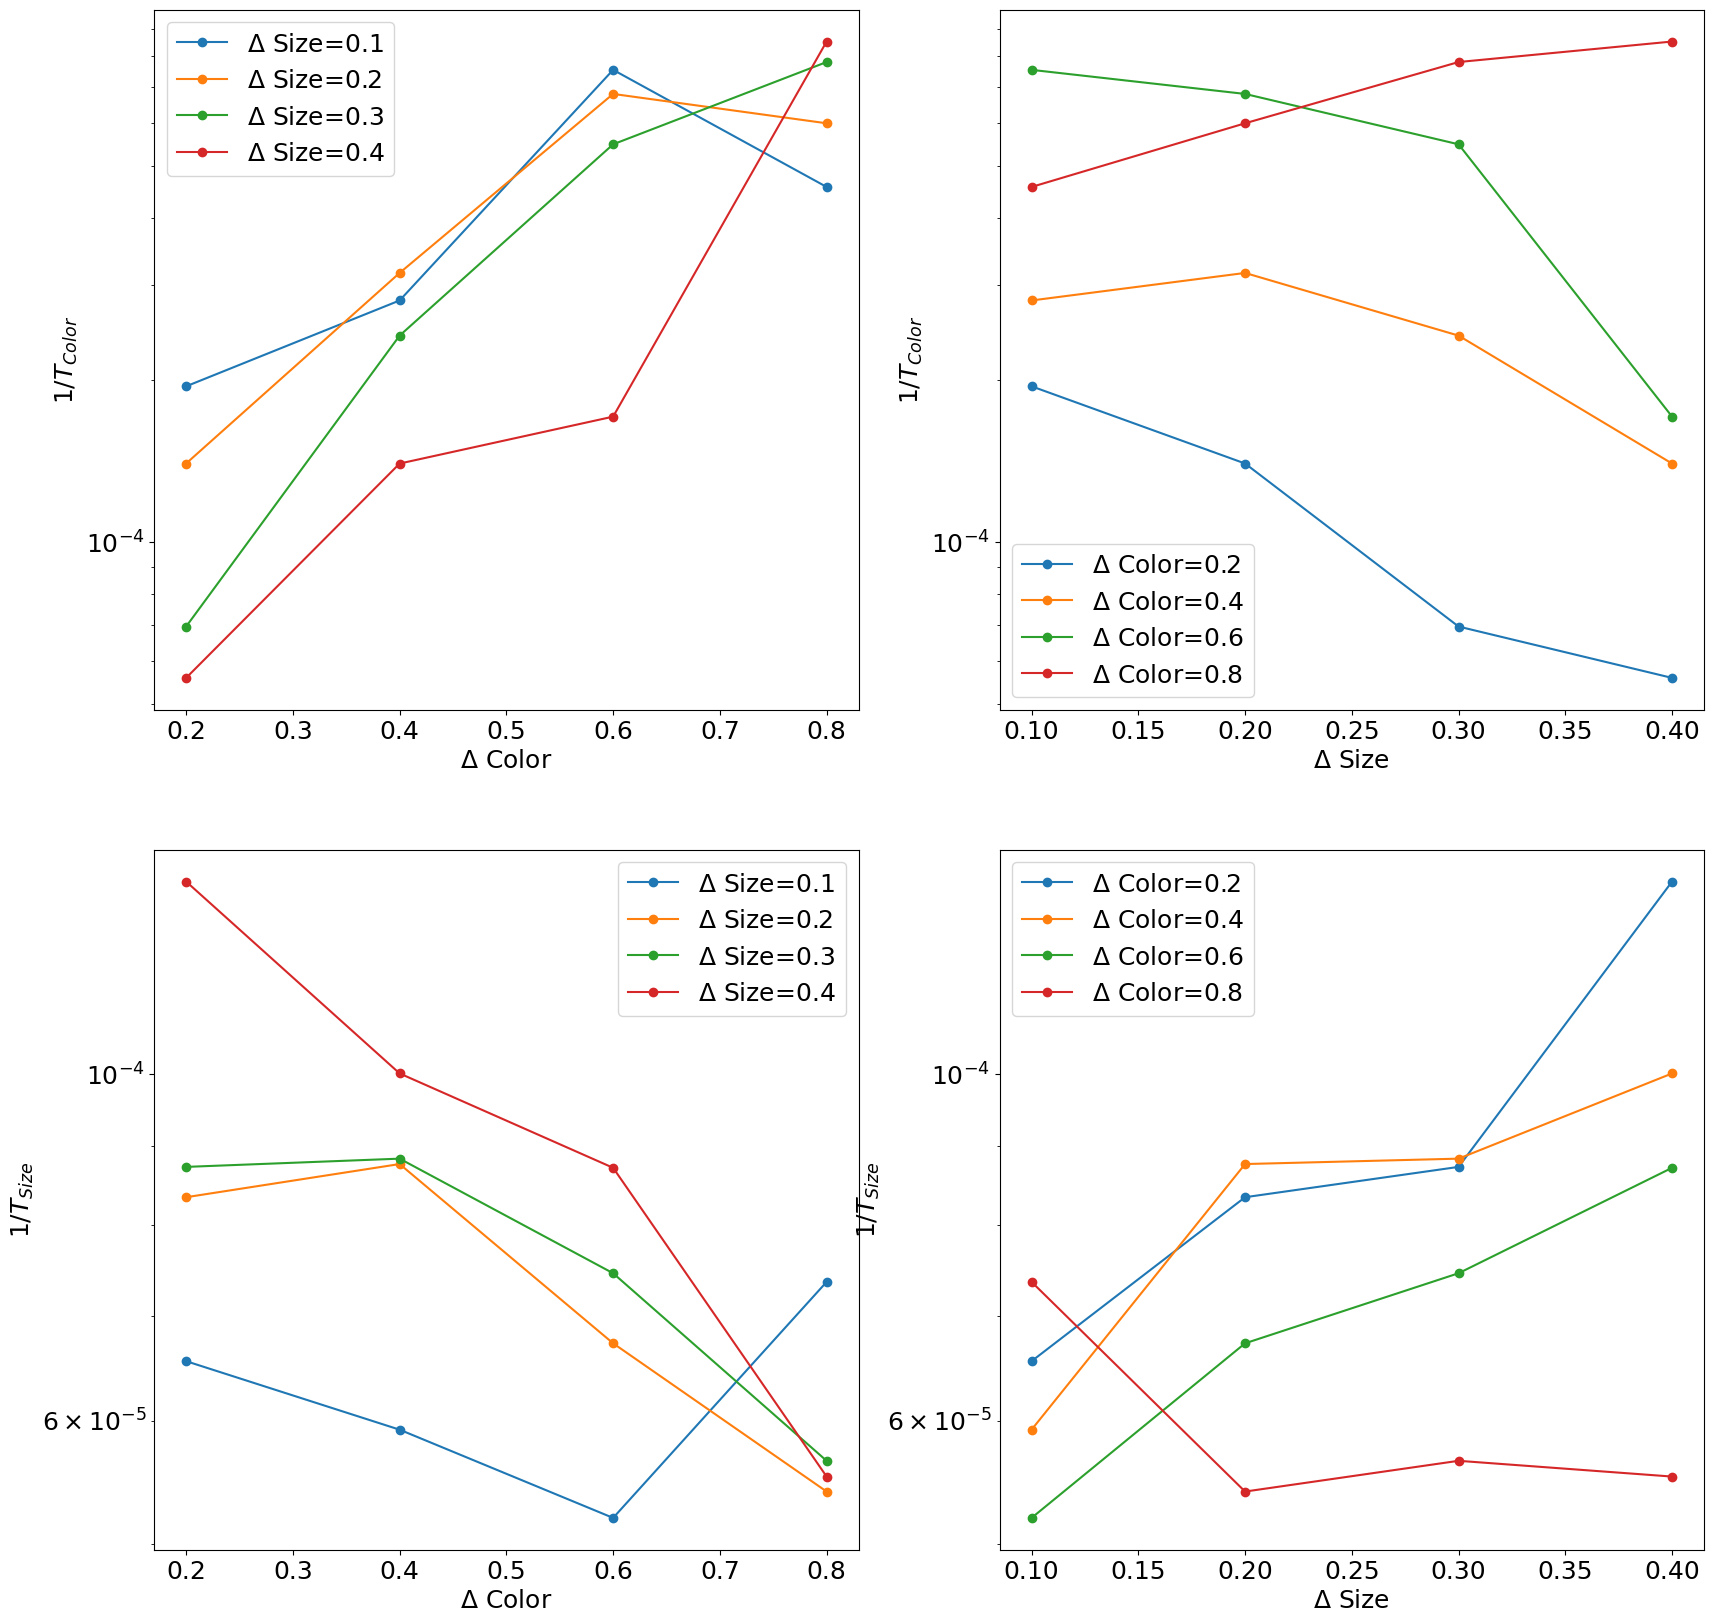

In [38]:
y_top=20000

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
for i in range(len(sep_sizes)):
    plt.plot(sep_cols_float,1/t_cols[:,i],label=r"$\Delta$ Size"+f"={sep_sizes[i]}",marker="o")
plt.legend()
plt.ylabel(r"$1/T_{Color}$")
plt.xlabel(r"$\Delta$ Color")
plt.yscale("log")

plt.subplot(2,2,2)
for i in range(len(sep_cols)):
    plt.plot(sep_sizes_float,1/t_cols[i],label=r"$\Delta$ Color"+f"={sep_cols[i]}",marker="o")
plt.legend()
plt.ylabel(r"$1/T_{Color}$")
plt.xlabel(r"$\Delta$ Size")
plt.yscale("log")

plt.subplot(2,2,3)
for i in range(len(sep_sizes)):
    plt.plot(sep_cols_float,1/t_sizes[:,i],label=r"$\Delta$ Size"+f"={sep_sizes[i]}",marker="o")
plt.legend()
plt.ylabel(r"$1/T_{Size}$")
plt.xlabel(r"$\Delta$ Color")
plt.yscale("log")

plt.subplot(2,2,4)
for i in range(len(sep_cols)):
    plt.plot(sep_sizes_float,1/t_sizes[i],label=r"$\Delta$ Color"+f"={sep_cols[i]}",marker="o")
plt.legend()
plt.ylabel(r"$1/T_{Size}$")
plt.xlabel(r"$\Delta$ Size")
plt.yscale("log")
#plt.savefig("../figures/final/learning_times_inv.png")

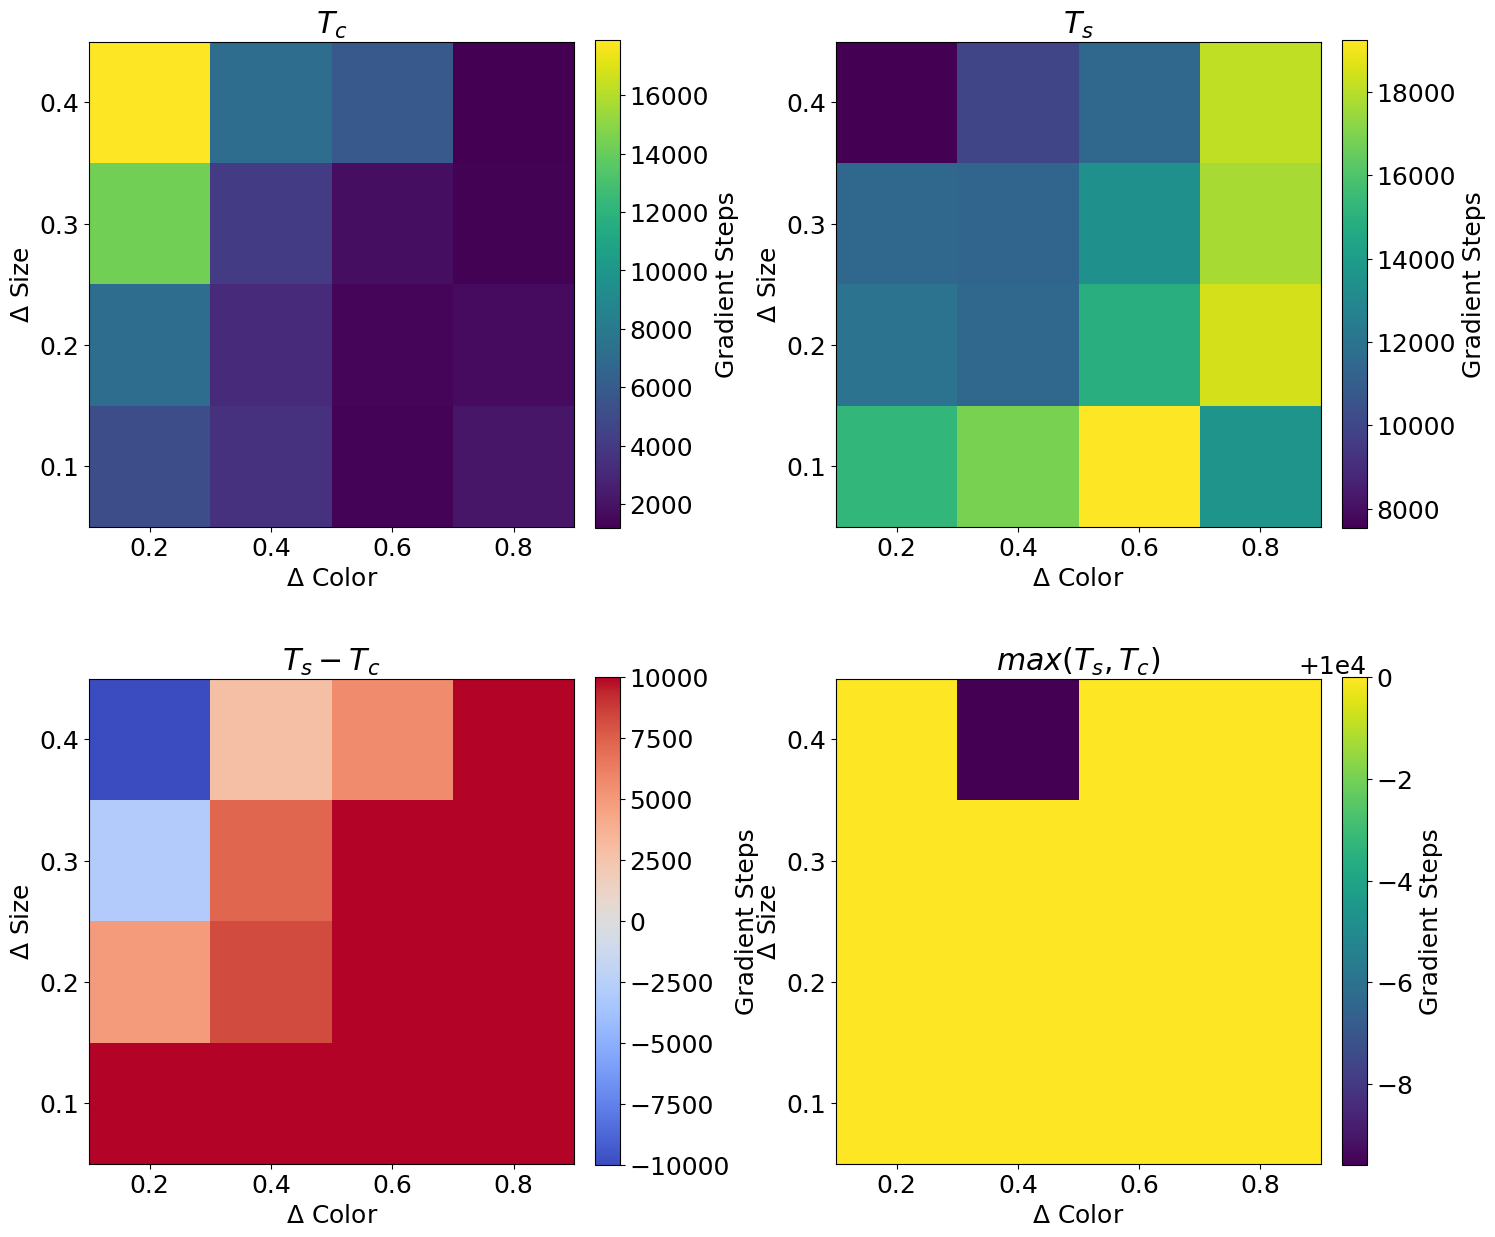

In [39]:
plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
plt.imshow(t_cols.transpose(1,0),interpolation="none",origin="lower")
plt.xticks(range(len(sep_cols)),sep_cols)
plt.yticks(range(len(sep_sizes)),sep_sizes)
plt.colorbar(fraction=0.046, pad=0.04,label="Gradient Steps")
plt.xlabel(r"$\Delta$ Color")
plt.ylabel(r"$\Delta$ Size")
plt.title(r"$T_c$")

plt.subplot(2,2,2)
plt.imshow(t_sizes.transpose(1,0),interpolation="none",origin="lower")
plt.xticks(range(len(sep_cols)),sep_cols)
plt.yticks(range(len(sep_sizes)),sep_sizes)
plt.colorbar(fraction=0.046, pad=0.04,label="Gradient Steps")
plt.xlabel(r"$\Delta$ Color")
plt.ylabel(r"$\Delta$ Size")
plt.title(r"$T_s$")
plt.subplot(2,2,3)
plt.imshow((t_sizes-t_cols).transpose(1,0),interpolation="none",origin="lower",cmap="coolwarm",vmin=-10000,vmax=10000)
plt.xticks(range(len(sep_cols)),sep_cols)
plt.yticks(range(len(sep_sizes)),sep_sizes)
plt.colorbar(fraction=0.046, pad=0.04,label="Gradient Steps")
plt.xlabel(r"$\Delta$ Color")
plt.ylabel(r"$\Delta$ Size")
plt.title(r"$T_s-T_c$")
plt.subplot(2,2,4)
plt.imshow(np.maximum(t_sizes,t_cols).transpose(1,0),interpolation="none",origin="lower",vmax=10000)
plt.xticks(range(len(sep_cols)),sep_cols)
plt.yticks(range(len(sep_sizes)),sep_sizes)
cb=plt.colorbar(fraction=0.046, pad=0.04,label="Gradient Steps")
plt.xlabel(r"$\Delta$ Color")
plt.ylabel(r"$\Delta$ Size")
plt.title(r"$max(T_s,T_c)$")
plt.tight_layout()
#plt.savefig("../figures/final/learning_times_2d.png")


In [31]:
#_=plt.scatter((t_sizes-t_cols),np.maximum(t_sizes,t_cols),s=10)
#plt.xlabel(r"$T_s-T_c$")

In [54]:
plot_datass={}
c=0
#for fol in glob.glob("../data/images_1/2x2_final2/sc4ss4/*/seed=*"):
for fol in glob.glob("../data/images_1/2x2_final2/col_sweep/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/col_sweep_inis=0.1/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/col_sweep_wd=0.05/*/seed=*"):
#for fol in glob.glob("../data/images_1/2x2_final2/col_sweep_det/*/seed=*"):
    parentfolname=os.path.basename(os.path.dirname(fol))
    sep_col=parentfolname.split("sep_col=")[1].split("_")[0]
    sep_size=parentfolname.split("sep_size=")[1].split("_")[0]
    plot_data_file=os.path.join(fol,"plot_data.pth")
    if not os.path.exists(plot_data_file):
        continue
    plot_data=torch.load(plot_data_file)
    plot_data["sep_col"]=sep_col
    plot_data["sep_size"]=sep_size
    plot_datass.setdefault((sep_col,sep_size),[]).append(plot_data)
    c+=1
    #if "seed=0" in fol:
    #    print(sep_col)
len(plot_datass),c

(20, 100)

In [55]:
config=utils.load_config('../data/images_1/2x2_final2/col_sweep/sep_col=0.8_sep_size=0.4/seed=0/seed=0.yaml')
#config=utils.load_config('../data/images_1/2x2_final2/col_sweep_inis=0.1/sep_col=0.8_sep_size=0.4/seed=0/seed=0.yaml')
#config=utils.load_config('../data/images_1/2x2_final2/col_sweep_wd=0.05/sep_col=0.8_sep_size=0.4/seed=0/seed=0.yaml')
x_tr,y_tr,l_tr,x_te,y_te,l_te=utils.generate_data(config,forgen=True)

In [56]:
i_step_min=5
plot_datas=plot_datass[list(plot_datass.keys())[0]]
save_steps=plot_datas[0]["save_steps"]
save_steps[i_step_min]

1053

In [57]:
cmap="gnuplot"
norm = mcolors.Normalize(vmin=0.1, vmax=0.8)
def sep_col_to_color(sep_col,cmap="gnuplot"):
    return matplotlib.colormaps[cmap](norm(float(sep_col)))

In [58]:
save_steps[20]

3933

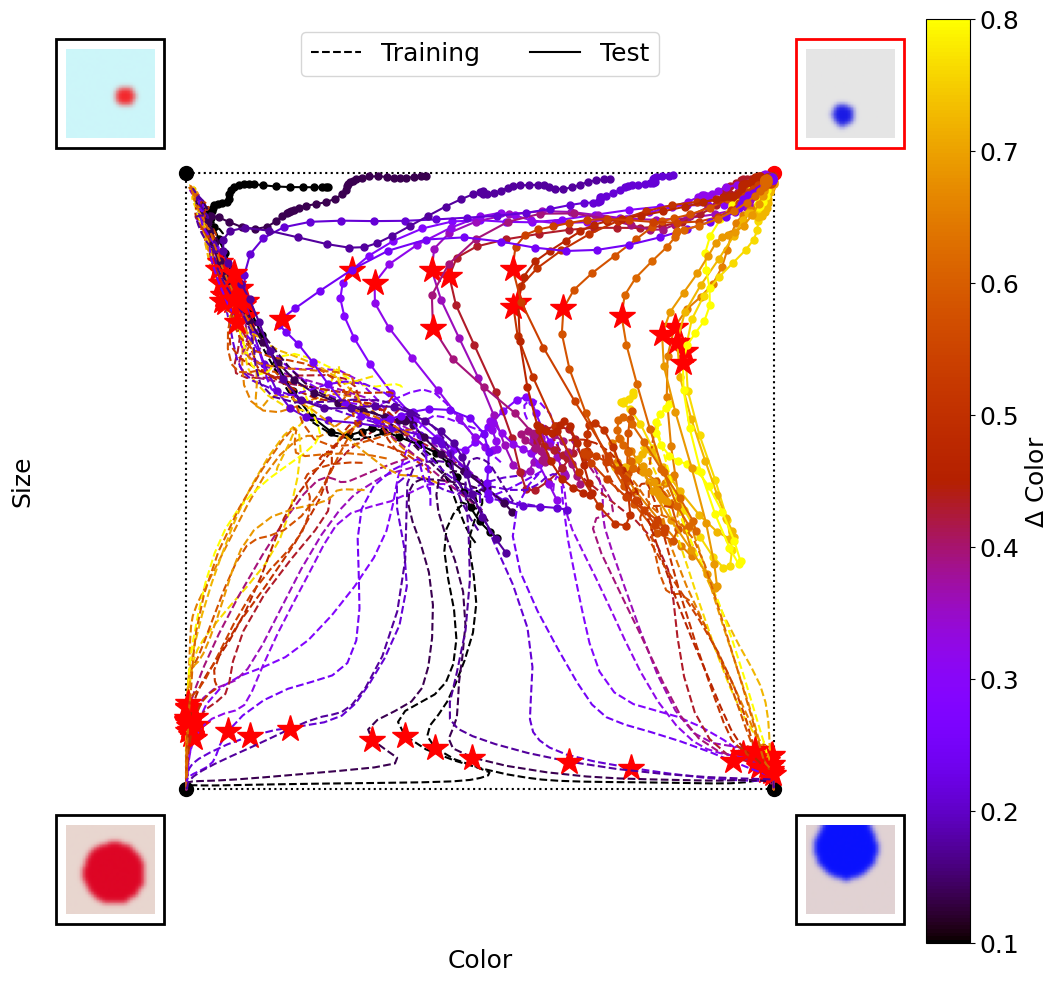

In [118]:
plt.figure(figsize=(12,12))
plt.plot([0,1,1,0,0,0],[0,0,1,1,0,0],c="k",ls=":")
plt.scatter([0,0,1],[0,1,0],c="k",s=100)
plt.scatter([1],[1],c="r",s=100)
trajs_trss=[]
trajs_tess=[]
sep_cols=[]
for key in plot_datass.keys():
    sep_col=key[0]
    sep_cols.append(float(sep_col))
    plot_datas=plot_datass[key]
    classprobs_pred_trs=[]
    classprobs_pred_tes=[]
    for plot_data in plot_datas:
        classprobs_pred_tr=np.array(plot_data['classprobs_pred_tr'])[...,1]
        l_tr=np.array(plot_data['l_tr'])
        classprobs_pred_trs.append(classprobs_pred_tr)
        classprobs_pred_te=np.array(plot_data['classprobs_pred_te'])[...,1]
        classprobs_pred_tes.append(classprobs_pred_te)
        l_te=np.array(plot_data['l_te'])
    classprobs_pred_trs=np.stack(classprobs_pred_trs,axis=0)
    classprobs_pred_tes=np.stack(classprobs_pred_tes,axis=0)
    #loop for tr
    trajs_trs=[]
    for i in range(3):
        trajs_trs.append(classprobs_pred_trs[:,:,:,l_tr==i].mean((0,3)))
    trajs_trs=np.stack(trajs_trs,axis=0)
    #in 2D only 1 test
    trajs_te=classprobs_pred_tes[:,:,:,l_te==3].mean((0,3))

    trajs_trs=sim.gaussian_filter1d(trajs_trs,2.0,axis=1,truncate=6.0)
    trajs_te=sim.gaussian_filter1d(trajs_te,2.0,axis=0,truncate=6.0)
    trajs_trss.append(trajs_trs)
    trajs_tess.append(trajs_te)
    color=sep_col_to_color(sep_col,cmap=cmap)
    plt.plot(trajs_te[i_step_min:,0],trajs_te[i_step_min:,1],marker="o",c=color,markersize=5)
    i_star=20
    plt.plot(trajs_te[i_star,0],trajs_te[i_star,1],marker="*",c="r",markersize=20)
    for i in range(3):
        plt.plot(trajs_trs[i,i_step_min:,0],trajs_trs[i,i_step_min:,1],ls="--",c=color)
        plt.plot(trajs_trs[i,i_star,0],trajs_trs[i,i_star,1],marker="*",c="r",markersize=20)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.ylabel("Size")
plt.xlabel("Color")
plt.plot([],[],c="k",ls="--",label="Training")
plt.plot([],[],c="k",label="Test")
plt.legend(loc="upper center",ncol=2)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
for l in [0,1,2,3]:
    i=np.random.randint(32)
    image=x_tr[l_tr==l][i].transpose(2,1,0) if l in [0,1,2] else x_te[l_te==l][i].transpose(2,1,0)
    imagebox = OffsetImage(image, zoom = 2.0)
    s=0.13
    coord={0:[0.-s,0.-s],1:[0.-s,1.+s],2:[1.+s,0.-s],3:[1.+s,1.+s]}[l]
    ab = AnnotationBbox(imagebox, coord, frameon = True ,bboxprops=dict(edgecolor="k" if l in [0,1,2] else "r",lw=2))
    plt.gca().add_artist(ab)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label(r"$\Delta$ Color")
#plt.savefig("../figures/final/training_dynamics_sep_col_wd=0.05.png")

In [120]:
trajs_trss=np.stack(trajs_trss,axis=0)
trajs_tess=np.stack(trajs_tess,axis=0)
trajs_trss.shape,trajs_tess.shape

((20, 3, 60, 2), (20, 60, 2))

In [53]:
#single

In [60]:
i_step_min=0
plot_datas=plot_datass[list(plot_datass.keys())[0]]
save_steps=plot_datas[0]["save_steps"]
save_steps[i_step_min]

500

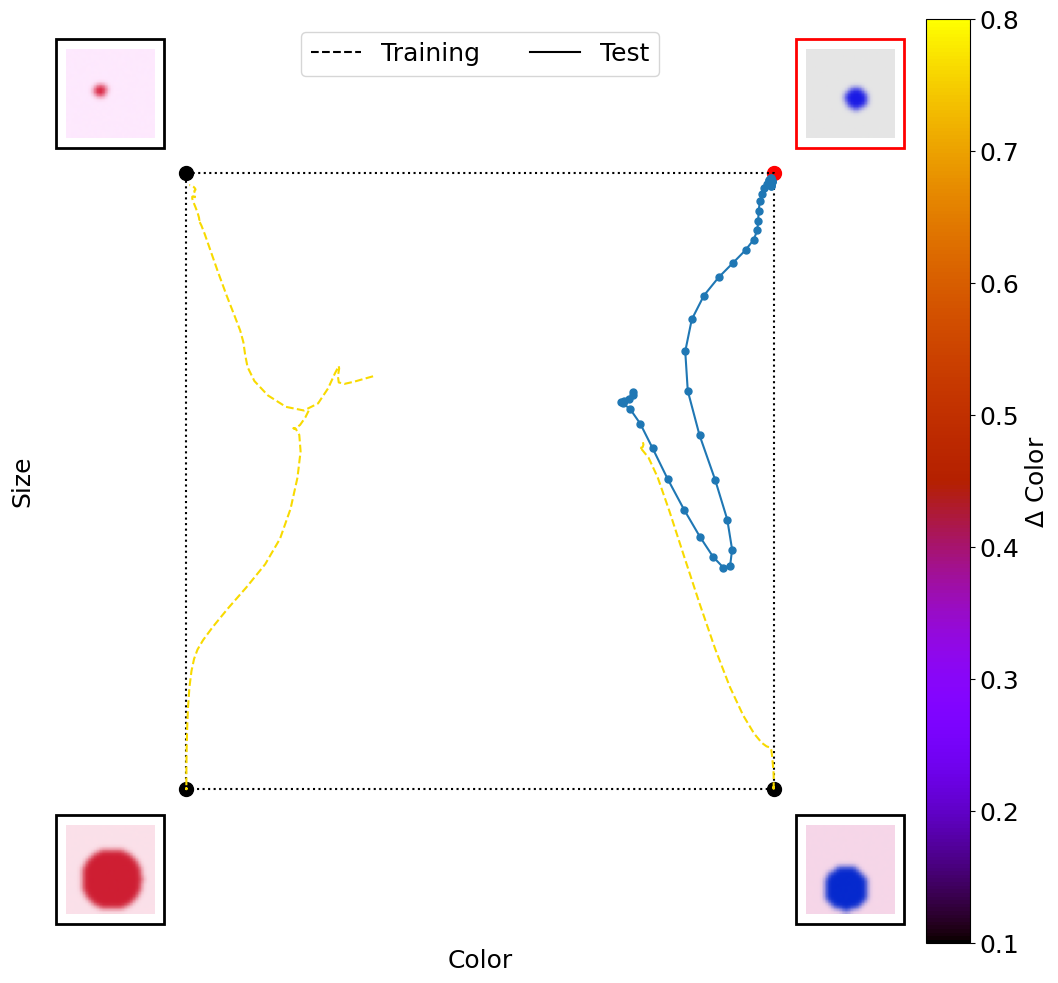

In [113]:
fig=plt.figure(figsize=(12,12))
plt.plot([0,1,1,0,0,0],[0,0,1,1,0,0],c="k",ls=":")
plt.scatter([0,0,1],[0,1,0],c="k",s=100)
plt.scatter([1],[1],c="r",s=100)
trajs_trss=[]
trajs_tess=[]
sep_cols=[]
for key in plot_datass.keys():
    sep_col=key[0]
    if sep_col!="0.763":#"0.211":#"0.763":#0.763
        continue
    sep_cols.append(float(sep_col))
    plot_datas=plot_datass[key]
    classprobs_pred_trs=[]
    classprobs_pred_tes=[]
    for plot_data in plot_datas:
        classprobs_pred_tr=np.array(plot_data['classprobs_pred_tr'])[...,1]
        l_tr=np.array(plot_data['l_tr'])
        classprobs_pred_trs.append(classprobs_pred_tr)
        classprobs_pred_te=np.array(plot_data['classprobs_pred_te'])[...,1]
        classprobs_pred_tes.append(classprobs_pred_te)
        l_te=np.array(plot_data['l_te'])
    classprobs_pred_trs=np.stack(classprobs_pred_trs,axis=0)
    classprobs_pred_tes=np.stack(classprobs_pred_tes,axis=0)
    #loop for tr
    trajs_trs=[]
    for i in range(3):
        trajs_trs.append(classprobs_pred_trs[:,:,:,l_tr==i].mean((0,3)))#.mean(3))#
    trajs_trs=np.stack(trajs_trs,axis=0)
    #in 2D only 1 test
    trajs_te=classprobs_pred_tes[:,:,:,l_te==3].mean((0,3))#.mean(3)#

    #trajs_trs=sim.gaussian_filter1d(trajs_trs,2.0,axis=2,truncate=6.0)
    #trajs_te=sim.gaussian_filter1d(trajs_te,2.0,axis=1,truncate=6.0)
    trajs_trs=sim.gaussian_filter1d(trajs_trs,2.0,axis=1,truncate=6.0)
    trajs_te=sim.gaussian_filter1d(trajs_te,2.0,axis=0,truncate=6.0)
    trajs_trss.append(trajs_trs)
    trajs_tess.append(trajs_te)
    #color=sep_col_to_color(sep_col,cmap=cmap)
    i_star=10
    plt.plot(trajs_te[i_step_min:,0],trajs_te[i_step_min:,1],marker="o",markersize=5)
    #plt.plot(trajs_te[i_star,0],trajs_te[i_star,1],marker="*",c="r",markersize=20)
    for i in range(3):
        plt.plot(trajs_trs[i,i_step_min:,0],trajs_trs[i,i_step_min:,1],ls="--",c=color)
        #plt.plot(trajs_trs[i,i_star,0],trajs_trs[i,i_star,1],marker="*",c="r",markersize=20)
    """
    for b in range(len(trajs_te)):
        plt.plot(trajs_te[b,i_step_min:,0],trajs_te[b,i_step_min:,1],marker="o",markersize=5)
        plt.plot(trajs_te[b,i_star,0],trajs_te[b,i_star,1],marker="*",c="r",markersize=20)
        #for i in range(3):
        #    plt.plot(trajs_trs[i,b,i_step_min:,0],trajs_trs[i,b,i_step_min:,1],ls="--",c=color)
        #    plt.plot(trajs_trs[i,b,i_star,0],trajs_trs[i,b,i_star,1],marker="*",c="r",markersize=20)
    """
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.ylabel("Size")
plt.xlabel("Color")
plt.plot([],[],c="k",ls="--",label="Training")
plt.plot([],[],c="k",label="Test")
plt.legend(loc="upper center",ncol=2)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
for l in [0,1,2,3]:
    i=np.random.randint(32)
    image=x_tr[l_tr==l][i].transpose(2,1,0) if l in [0,1,2] else x_te[l_te==l][i].transpose(2,1,0)
    imagebox = OffsetImage(image, zoom = 2.0)
    s=0.13
    coord={0:[0.-s,0.-s],1:[0.-s,1.+s],2:[1.+s,0.-s],3:[1.+s,1.+s]}[l]
    ab = AnnotationBbox(imagebox, coord, frameon = True ,bboxprops=dict(edgecolor="k" if l in [0,1,2] else "r",lw=2))
    plt.gca().add_artist(ab)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label(r"$\Delta$ Color")
#plt.savefig("../figures/final/training_dynamics_sep_col_wd=0.05.png")

In [114]:
import copy

In [115]:
fig_=copy.deepcopy(fig)

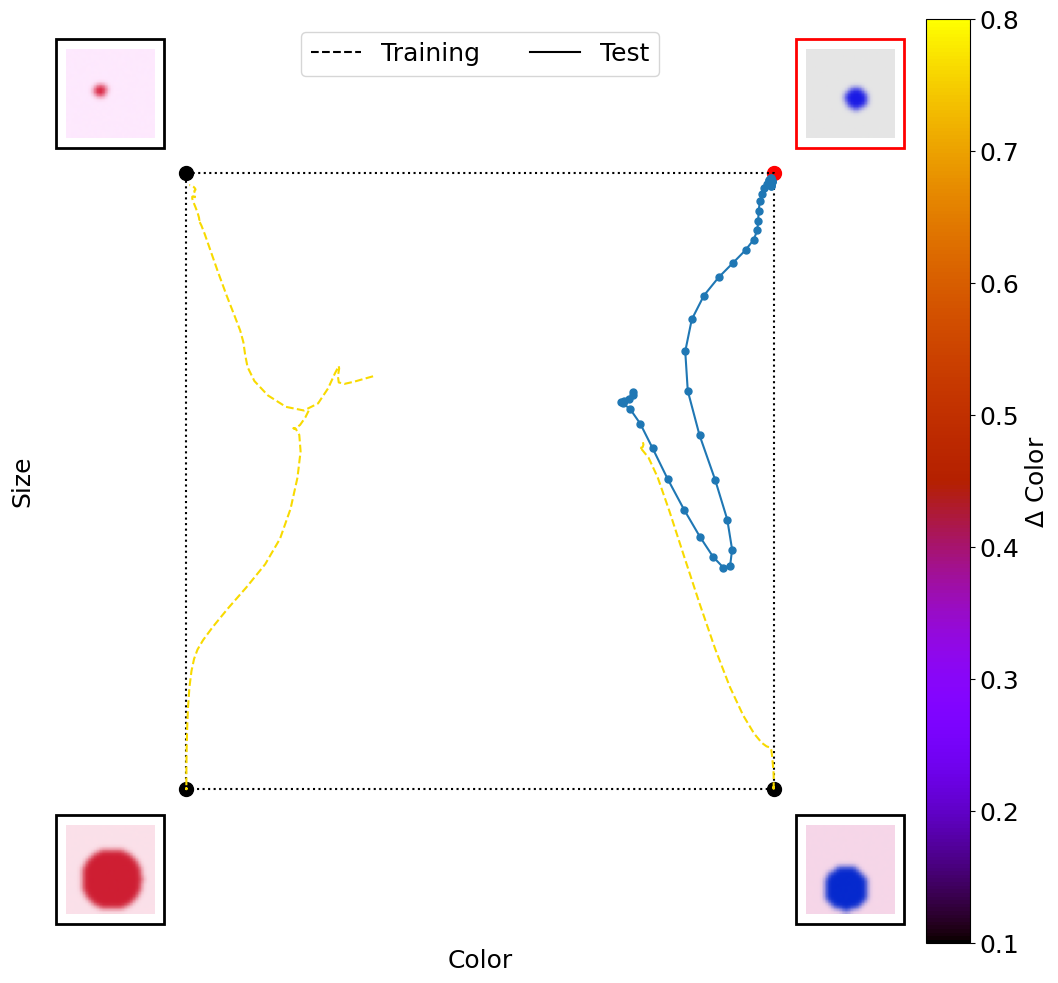

In [116]:
fig_

In [ ]:

i_star=10
ax.plot(trajs_te[i_star,0],trajs_te[i_star,1],marker="*",c="r",markersize=20)
for i in range(3):
    fig_.gca().plot(trajs_trs[i,i_star,0],trajs_trs[i,i_star,1],marker="*",c="r",markersize=20)
fig_

In [ ]:

i_star=10
plt.plot(trajs_te[i_star,0],trajs_te[i_star,1],marker="*",c="r",markersize=20)
for i in range(3):
    plt.plot(trajs_trs[i,i_star,0],trajs_trs[i,i_star,1],marker="*",c="r",markersize=20)

In [52]:
sep_cols=np.array(sep_cols)

In [46]:
trajs_trss=np.stack(trajs_trss,axis=0)
trajs_tess=np.stack(trajs_tess,axis=0)
displacement_trss=np.linalg.norm(np.gradient(trajs_trss,save_steps,axis=2),axis=3)
displacement_tess=np.linalg.norm(np.gradient(trajs_tess,save_steps,axis=1),axis=2)

(20, 3, 60, 2)

In [88]:
displacement_trss_m=displacement_trss.mean((0,1))
displacement_trss_s=displacement_trss.std((0,1),ddof=1)
displacement_trss_cm=displacement_trss.mean(1)
log_displacement_trss_cm=np.log(displacement_trss_cm)

displacement_tess_m=displacement_tess.mean(0)
displacement_tess_s=displacement_tess.std(0,ddof=1)
displacement_tess_cm=displacement_tess
log_displacement_tess_cm=np.log(displacement_tess_cm)

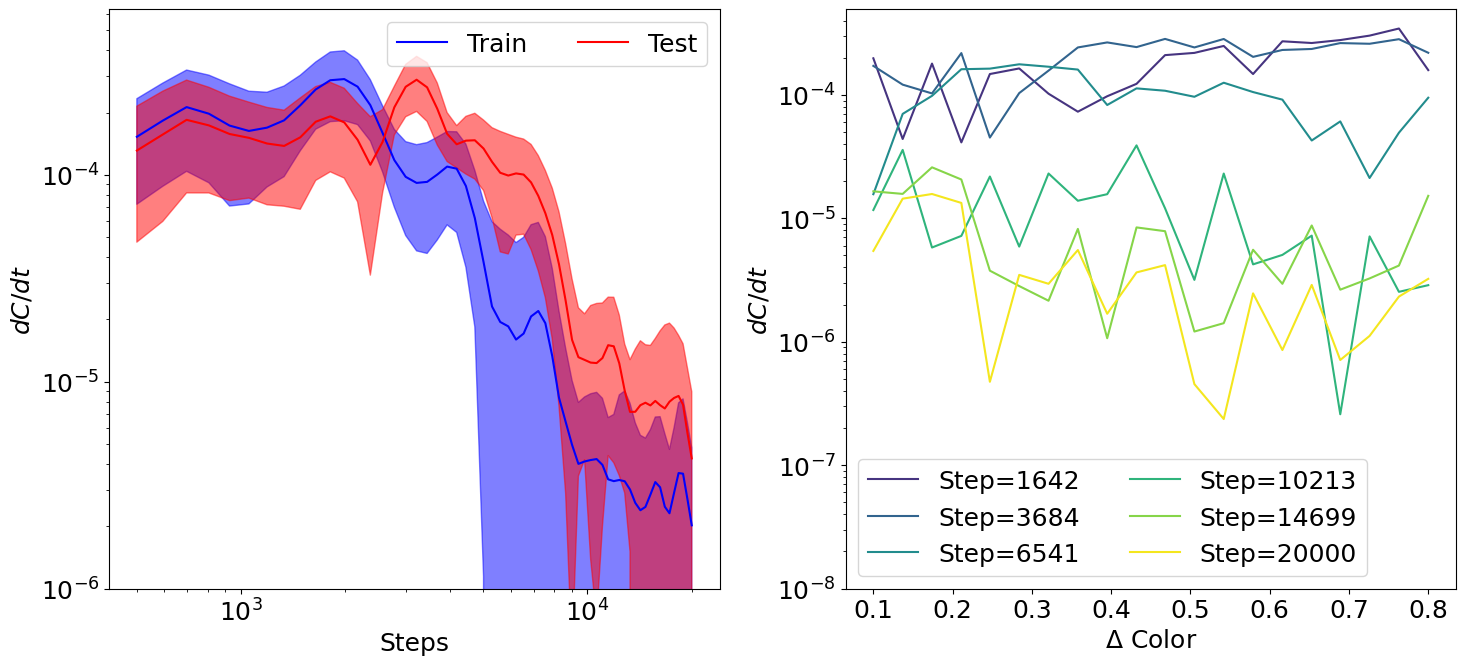

In [117]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(save_steps,displacement_trss_m,c="b",label="Train")
plt.fill_between(save_steps,displacement_trss_m-displacement_trss_s,displacement_trss_m+displacement_trss_s,alpha=0.5,color="b")
plt.plot(save_steps,displacement_tess_m,c="r",label="Test")
plt.fill_between(save_steps,displacement_tess_m-displacement_tess_s,displacement_tess_m+displacement_tess_s,alpha=0.5,color="r")
plt.yscale("log")
plt.xscale("log")
plt.ylim(bottom=1e-6)
plt.ylabel(r"$dC/dt$")
plt.xlabel("Steps")
plt.legend(ncol=2)

plt.subplot(1,2,2)
for i in [9,19,29,39,49,59]:
    indsort=np.argsort(sep_cols)
    step=save_steps[i]
    #_=plt.plot(sep_cols[indsort],displacement_trss_cm[:,i][indsort],c=matplotlib.colormaps["viridis"](i/60),ls="--",alpha=0.5)
    _=plt.plot(sep_cols[indsort],displacement_tess_cm[:,i][indsort],c=matplotlib.colormaps["viridis"](i/60),label=f"Step={step}")
plt.yscale("log")
plt.ylim(bottom=1e-8)
plt.ylabel(r"$dC/dt$")
plt.xlabel(r"$\Delta$ Color")
plt.legend(ncol=2)

plt.tight_layout()
#plt.savefig("../figures/final/dCdt.png")

In [80]:
log_steps=np.log(save_steps)

In [99]:
#variance explained from the two dimensions
import sklearn.linear_model as sklin
import sklearn.metrics as skmet
x_sep_cols=sep_cols[:,None].repeat(60,axis=1).reshape(-1,1)
x_log_steps=log_steps[None,:].repeat(20,axis=0).reshape(-1,1)
x_joint=np.concatenate([x_sep_cols,x_log_steps],axis=1)
y=log_displacement_trss_cm.reshape(-1,1)

linreg_sep_cols=sklin.LinearRegression()
linreg_sep_cols.fit(x_sep_cols,y)
r2_sep_cols=skmet.r2_score(y,linreg_sep_cols.predict(x_sep_cols))

linreg_log_steps=sklin.LinearRegression()
linreg_log_steps.fit(x_log_steps,y)
r2_log_steps=skmet.r2_score(y,linreg_log_steps.predict(x_log_steps))

linreg_joint=sklin.LinearRegression()
linreg_joint.fit(x_joint,y)
r2_joint=skmet.r2_score(y,linreg_joint.predict(x_joint))

r2_sep_cols,r2_log_steps,r2_joint

(0.010445819627637465, 0.7922229880231804, 0.8026688060810088)

In [48]:
plot_datass={}
c=0
#for fol in glob.glob("../data/images_1/2x2_final2/sc4ss4/*/seed=*"):
for fol in glob.glob("../data/images_1/2x2_final2/size_sweep/*/seed=*"):
    parentfolname=os.path.basename(os.path.dirname(fol))
    sep_col=parentfolname.split("sep_col=")[1].split("_")[0]
    sep_size=parentfolname.split("sep_size=")[1].split("_")[0]
    plot_data_file=os.path.join(fol,"plot_data.pth")
    if not os.path.exists(plot_data_file):
        continue
    plot_data=torch.load(plot_data_file)
    plot_data["sep_col"]=sep_col
    plot_data["sep_size"]=sep_size
    plot_datass.setdefault((sep_col,sep_size),[]).append(plot_data)
    c+=1
    #if "seed=0" in fol:
    #    print(sep_col)
len(plot_datass),c

(20, 75)

In [49]:
fol

'../data/images_1/2x2_final2/size_sweep/sep_col=0.4_sep_size=0.316/seed=0'

In [50]:
config=utils.load_config('../data/images_1/2x2_final2/size_sweep/sep_col=0.4_sep_size=0.389/seed=0/seed=0.yaml')
x_tr,y_tr,l_tr,x_te,y_te,l_te=utils.generate_data(config,forgen=True)

In [55]:
i_step_min=0
plot_datas=plot_datass[list(plot_datass.keys())[0]]
plot_datas[0]["save_steps"][i_step_min]

594

In [56]:
import matplotlib
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap="cubehelix"
norm = mcolors.Normalize(vmin=0.2, vmax=0.389)
def sep_col_to_color(sep_col,cmap="gnuplot"):
    return matplotlib.colormaps[cmap](norm(float(sep_col)))

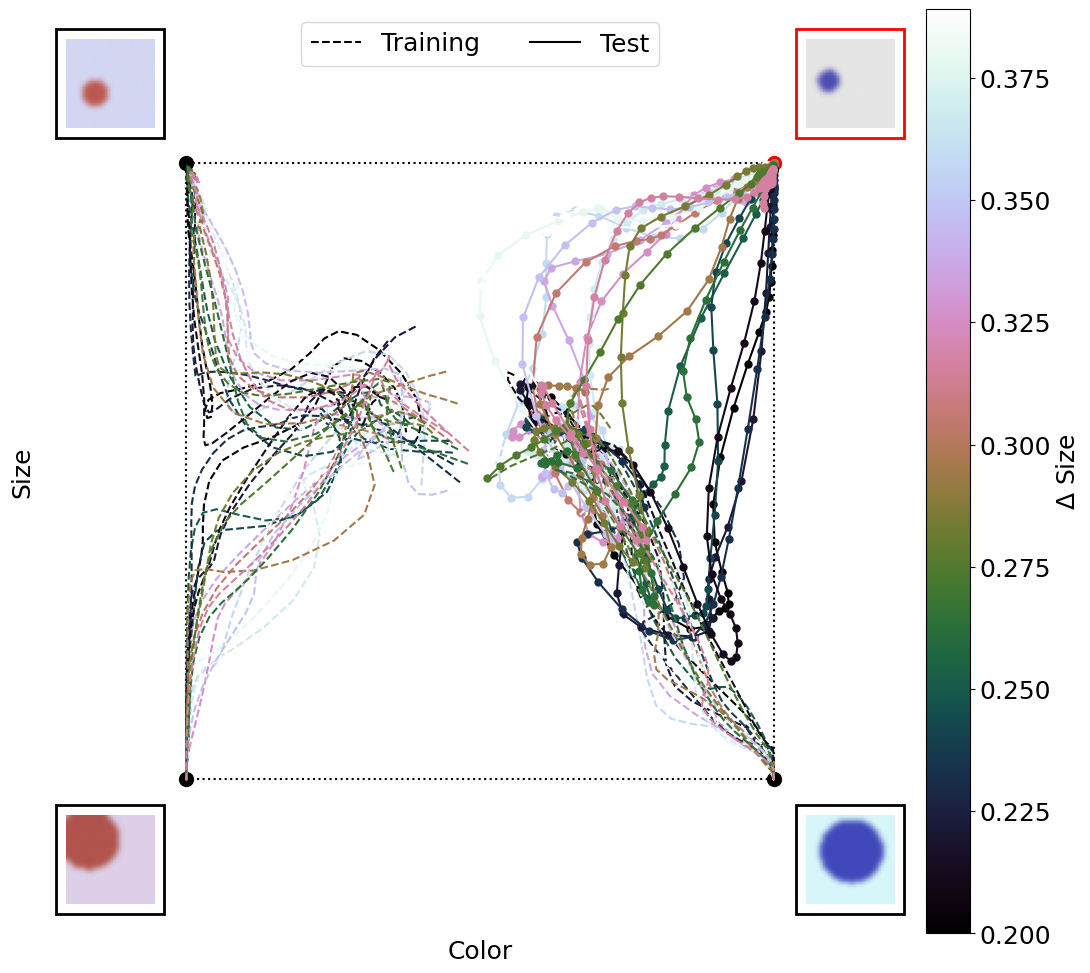

In [57]:
plt.figure(figsize=(12,12))
plt.plot([0,1,1,0,0,0],[0,0,1,1,0,0],c="k",ls=":")
plt.scatter([0,0,1],[0,1,0],c="k",s=100)
plt.scatter([1],[1],c="r",s=100)
for key in plot_datass.keys():
    sep_size=key[1]
    plot_datas=plot_datass[key]
    classprobs_pred_trs=[]
    classprobs_pred_tes=[]
    for plot_data in plot_datas:
        classprobs_pred_tr=np.array(plot_data['classprobs_pred_tr'])[...,1]
        l_tr=np.array(plot_data['l_tr'])
        classprobs_pred_trs.append(classprobs_pred_tr)
        classprobs_pred_te=np.array(plot_data['classprobs_pred_te'])[...,1]
        classprobs_pred_tes.append(classprobs_pred_te)
        l_te=np.array(plot_data['l_te'])
    classprobs_pred_trs=np.stack(classprobs_pred_trs,axis=0)
    classprobs_pred_tes=np.stack(classprobs_pred_tes,axis=0)
    #loop for tr
    trajs_trs=[]
    for i in range(3):
        trajs_trs.append(classprobs_pred_trs[:,:,:,l_tr==i].mean((0,3)))
    trajs_trs=np.stack(trajs_trs,axis=0)
    #in 2D only 1 test
    trajs_te=classprobs_pred_tes[:,:,:,l_te==3].mean((0,3))

    trajs_trs=sim.gaussian_filter1d(trajs_trs,2.0,axis=1)
    trajs_te=sim.gaussian_filter1d(trajs_te,2.0,axis=0)
    color=sep_col_to_color(sep_size,cmap=cmap)
    plt.plot(trajs_te[i_step_min:,0],trajs_te[i_step_min:,1],marker="o",c=color,markersize=5)
    for i in range(3):
        plt.plot(trajs_trs[i,i_step_min:,0],trajs_trs[i,i_step_min:,1],ls="--",c=color)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.ylabel("Size")
plt.xlabel("Color")
plt.plot([],[],c="k",ls="--",label="Training")
plt.plot([],[],c="k",label="Test")
plt.legend(loc="upper center",ncol=2)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
for l in [0,1,2,3]:
    i=np.random.randint(32)
    image=x_tr[l_tr==l][i].transpose(2,1,0) if l in [0,1,2] else x_te[l_te==l][i].transpose(2,1,0)
    imagebox = OffsetImage(image, zoom = 2.0)
    s=0.13
    coord={0:[0.-s,0.-s],1:[0.-s,1.+s],2:[1.+s,0.-s],3:[1.+s,1.+s]}[l]
    ab = AnnotationBbox(imagebox, coord, frameon = True ,bboxprops=dict(edgecolor="k" if l in [0,1,2] else "r",lw=2))
    plt.gca().add_artist(ab)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label(r"$\Delta$ Size")
plt.savefig("../figures/final/training_dynamics_sep_size.png")

In [135]:
plot_datass={}
c=0
for fol in glob.glob("../data/images_1/2x2_final2/detailed/*/seed=*"):
    parentfolname=os.path.basename(os.path.dirname(fol))
    sep_col=parentfolname.split("sep_col=")[1].split("_")[0]
    sep_size=parentfolname.split("sep_size=")[1].split("_")[0]
    if (sep_col,sep_size) not in [("0.4","0.333"),("0.8","0.333"),("0.2","0.333"),("0.4","0.2"),("0.4","0.4")]:
        continue

    plot_data_file=os.path.join(fol,"plot_data.pth")
    if not os.path.exists(plot_data_file):
        continue
    plot_data=torch.load(plot_data_file)
    plot_data["sep_col"]=sep_col
    plot_data["sep_size"]=sep_size
    plot_datass.setdefault((sep_col,sep_size),[]).append(plot_data)
    c+=1
    #if "seed=0" in fol:
    #    print(sep_col)
len(plot_datass),c

(5, 25)

In [136]:
config=utils.load_config('../data/images_1/2x2_final2/detailed/sep_col=0.4_sep_size=0.333/seed=0/seed=0.yaml')
x_tr,y_tr,l_tr,x_te,y_te,l_te=utils.generate_data(config,forgen=True)

In [137]:
i_step_min=0
plot_datas=plot_datass[list(plot_datass.keys())[0]]
plot_datas[0]["save_steps"][i_step_min]

10

In [138]:
import matplotlib
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap="gnuplot"
norm = mcolors.Normalize(vmin=0.2, vmax=0.389)
def sep_col_to_color(sep_col,cmap="gnuplot"):
    return matplotlib.colormaps[cmap](norm(float(sep_col)))

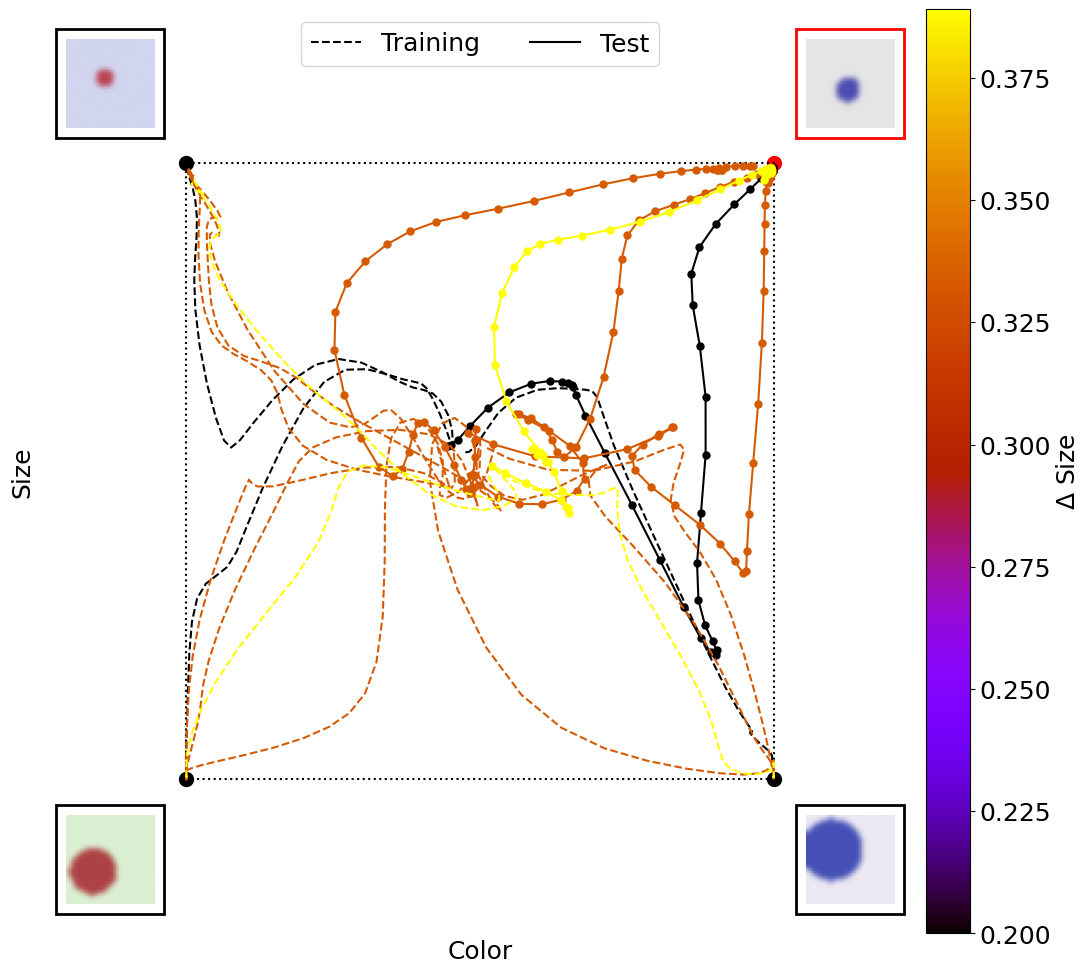

In [139]:
plt.figure(figsize=(12,12))
plt.plot([0,1,1,0,0,0],[0,0,1,1,0,0],c="k",ls=":")
plt.scatter([0,0,1],[0,1,0],c="k",s=100)
plt.scatter([1],[1],c="r",s=100)
for key in plot_datass.keys():
    sep_size=key[1]
    plot_datas=plot_datass[key]
    classprobs_pred_trs=[]
    classprobs_pred_tes=[]
    for plot_data in plot_datas:
        classprobs_pred_tr=np.array(plot_data['classprobs_pred_tr'])[...,1]
        l_tr=np.array(plot_data['l_tr'])
        classprobs_pred_trs.append(classprobs_pred_tr)
        classprobs_pred_te=np.array(plot_data['classprobs_pred_te'])[...,1]
        classprobs_pred_tes.append(classprobs_pred_te)
        l_te=np.array(plot_data['l_te'])
    classprobs_pred_trs=np.stack(classprobs_pred_trs,axis=0)
    classprobs_pred_tes=np.stack(classprobs_pred_tes,axis=0)
    #loop for tr
    trajs_trs=[]
    for i in range(3):
        trajs_trs.append(classprobs_pred_trs[:,:,:,l_tr==i].mean((0,3)))
    trajs_trs=np.stack(trajs_trs,axis=0)
    #in 2D only 1 test
    trajs_te=classprobs_pred_tes[:,:,:,l_te==3].mean((0,3))

    trajs_trs=sim.gaussian_filter1d(trajs_trs,2.0,axis=1)
    trajs_te=sim.gaussian_filter1d(trajs_te,2.0,axis=0)
    color=sep_col_to_color(sep_size,cmap=cmap)
    plt.plot(trajs_te[i_step_min:,0],trajs_te[i_step_min:,1],marker="o",c=color,markersize=5)
    for i in range(3):
        plt.plot(trajs_trs[i,i_step_min:,0],trajs_trs[i,i_step_min:,1],ls="--",c=color)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.ylabel("Size")
plt.xlabel("Color")
plt.plot([],[],c="k",ls="--",label="Training")
plt.plot([],[],c="k",label="Test")
plt.legend(loc="upper center",ncol=2)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
for l in [0,1,2,3]:
    i=np.random.randint(32)
    image=x_tr[l_tr==l][i].transpose(2,1,0) if l in [0,1,2] else x_te[l_te==l][i].transpose(2,1,0)
    imagebox = OffsetImage(image, zoom = 2.0)
    s=0.13
    coord={0:[0.-s,0.-s],1:[0.-s,1.+s],2:[1.+s,0.-s],3:[1.+s,1.+s]}[l]
    ab = AnnotationBbox(imagebox, coord, frameon = True ,bboxprops=dict(edgecolor="k" if l in [0,1,2] else "r",lw=2))
    plt.gca().add_artist(ab)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label(r"$\Delta$ Size")
plt.savefig("../figures/final/training_dynamics_scss.png")

ckpt stuff

In [ ]:
plot_datass={}
c=0
for fol in glob.glob("../data/images_1/2x2_final2/"):
    pass

In [60]:
ckpts=plot_datas[0]["ckpts"]
ckpt_keys=ckpts[0].keys()
tckpt={}
for key in ckpt_keys:
    if "model.score_model" not in key:
        continue
    key_=key.replace("model.score_model.","")
    tckpt[key_]=[]
    for ckpt in ckpts:
        tckpt[key_].append(ckpt[key])  
    tckpt[key_]=torch.stack(tckpt[key_],axis=0).cpu().numpy()
    print(key_,tckpt[key_].shape)

embed_t_conditioning.0.weight (60, 256, 64)
embed_t_conditioning.0.bias (60, 256)
embed_t_conditioning.2.weight (60, 256, 256)
embed_t_conditioning.2.bias (60, 256)
embedders.0.0.0.weight (60, 1024, 256)
embedders.0.0.0.bias (60, 1024)
embedders.0.0.2.weight (60, 1024, 1024)
embedders.0.0.2.bias (60, 1024)
embedders.0.1.0.weight (60, 1024, 2)
embedders.0.1.0.bias (60, 1024)
embedders.0.1.2.weight (60, 1024, 1024)
embedders.0.1.2.bias (60, 1024)
layers.0.weight (60, 1024, 2)
layers.0.bias (60, 1024)
layers.1.weight (60, 2, 1024)
layers.1.bias (60, 2)


In [61]:
tckpt['embedders.0.1.2.weight'].shape

(60, 1024, 1024)

In [62]:
eigvs=np.linalg.eigvals(tckpt['embedders.0.1.2.weight'])
eigvs.shape

(60, 1024)

In [63]:
eigvs_abs=np.abs(eigvs)**2

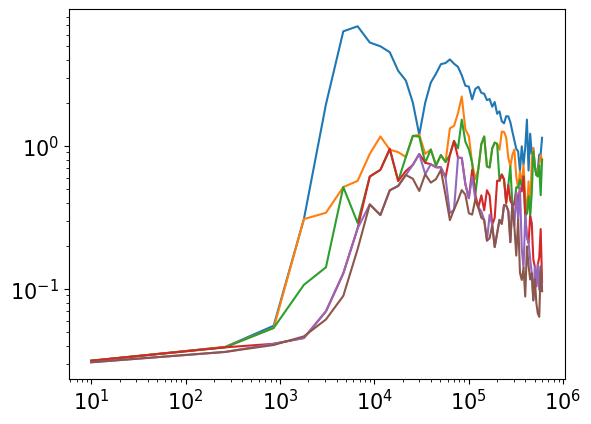

In [64]:
plt.plot(save_steps,eigvs_abs[:,0])
plt.plot(save_steps,eigvs_abs[:,1])
plt.plot(save_steps,eigvs_abs[:,2])
plt.plot(save_steps,eigvs_abs[:,3])
plt.plot(save_steps,eigvs_abs[:,4])
plt.plot(save_steps,eigvs_abs[:,5])
plt.xscale("log")
plt.yscale("log")

In [65]:
def mMn(vals):
    m=vals.min()
    M=vals.max()
    return (vals-m)/(M-m)

Text(0, 0.5, 'Eigenvalue')

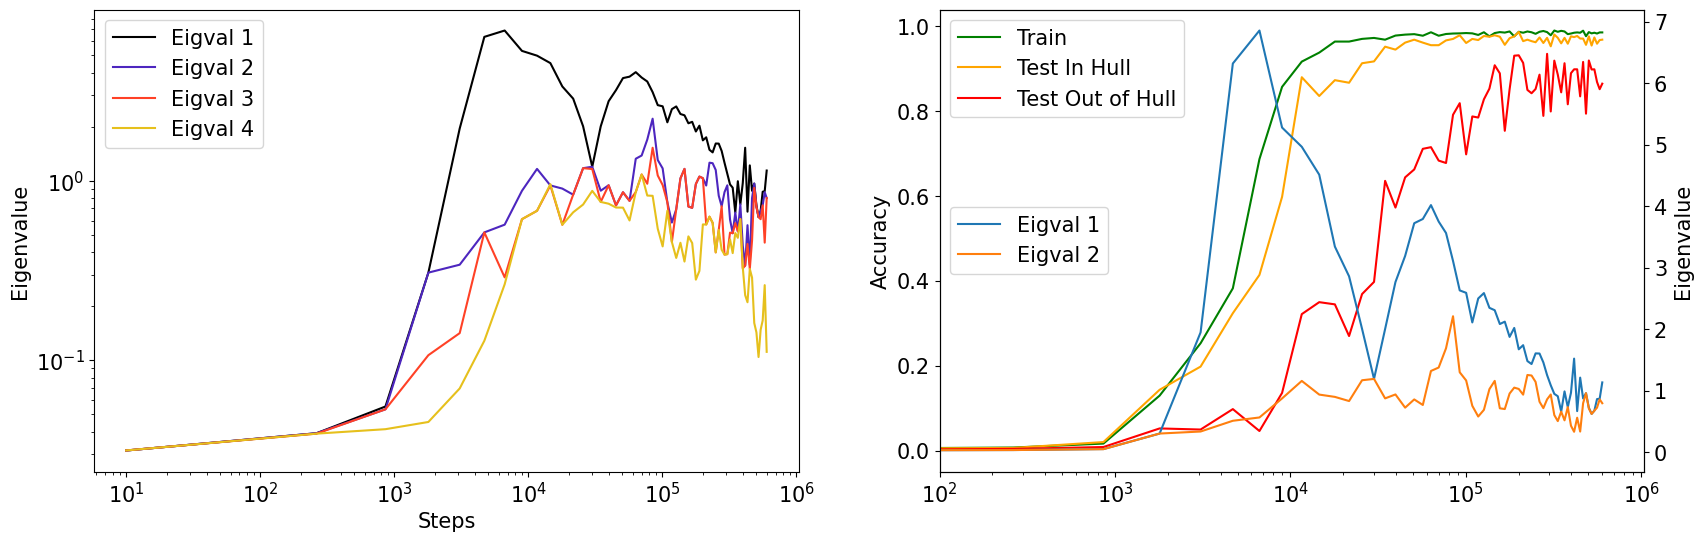

In [66]:
x_left=100
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 15})
plt.subplot(1,2,1)
cmap=plt.get_cmap("CMRmap")
for i in range(4):
    plt.plot(save_steps,eigvs_abs[:,i],color=cmap(i/4),label="Eigval "+str(i+1))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Steps")
plt.ylabel("Eigenvalue")
plt.legend()

plt.subplot(1,2,2)
plt.plot(save_steps,triaccm,c="green",label="Train")
plt.plot(save_steps,inhaccm,c="orange",label="Test In Hull")
plt.plot(save_steps,oohaccm,c="red",label="Test Out of Hull")
plt.xscale("log")
plt.legend()
plt.xlim(left=x_left)
plt.ylabel("Accuracy")
plt.twinx()
plt.plot(save_steps,eigvs_abs[:,0],label="Eigval 1")
plt.plot(save_steps,eigvs_abs[:,1],label="Eigval 2")
plt.legend(loc="center left")
plt.xlabel("Steps")
plt.ylabel("Eigenvalue")
#plt.savefig("./figures/eigen_predict.png")

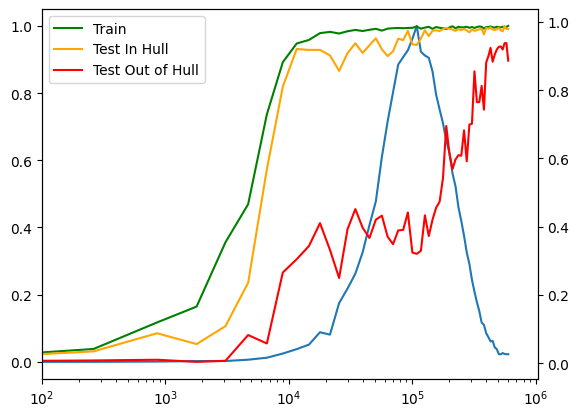

In [20]:
x_left=100
min_vlb=plot_data["min_vlb"]
#plt.plot(save_steps,np.linalg.norm(tckpt['embedders.0.1.0.weight'][:,:,0],axis=1))
#plt.plot(save_steps,np.linalg.norm(tckpt['embedders.0.1.0.bias'][:,:],axis=1))
#plt.plot(save_steps,np.linalg.norm(tckpt['embedders.0.1.2.bias'][:,:],axis=1))
plt.plot(save_steps,mMn(eigvs_abs[:,0]),label="Max. Eigval. of Cond. Proj.")
#plt.plot(save_steps,mMn(np.linalg.norm(tckpt['layers.0.weight'][:,:,0],axis=1)))
#plt.plot(save_steps,mMn(np.linalg.norm(tckpt['layers.0.bias'],axis=1)))
#plt.plot(save_steps,mMn(np.linalg.norm(tckpt['layers.1.bias'],axis=1)))
plt.xscale("log")
plt.xlim(left=x_left)
#plt.twinx()
#plt.plot(save_steps,val_losses-min_vlb,c="green",alpha=0.5)
#plt.plot(save_steps,te_losses-min_vlb,c="red",alpha=0.5)
#plt.yscale("log")
plt.twinx()
plt.plot(save_steps,triaccm,c="green",label="Train")
plt.plot(save_steps,inhaccm,c="orange",label="Test In Hull")
plt.plot(save_steps,oohaccm,c="red",label="Test Out of Hull")
#plt.plot(save_steps,acctr_m,c="green",ls="--")
#plt.plot(save_steps,accte_m,c="red",ls="--")
plt.legend()
